Теперь эти данные готовы для построения регрессионной модели. Попробуем предсказать цену на квартиры с помощью нескольких признаков квартиры.

Но для начала освежим в памяти все этапы предобработки.

Начнём с подгружения нужных библиотек:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Теперь подгрузим файл и посмотрим на его первые строки:

In [3]:
data = pd.read_csv('data/data_flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


Также обязательно запрашиваем список переменных с их типами, заодно сможем посмотреть, сколько у нас пропусков:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

Также количество пропусков для каждого признака можно посмотреть следующим образом:

In [5]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

Или можно оценить визуально количество пропусков и их распределение:

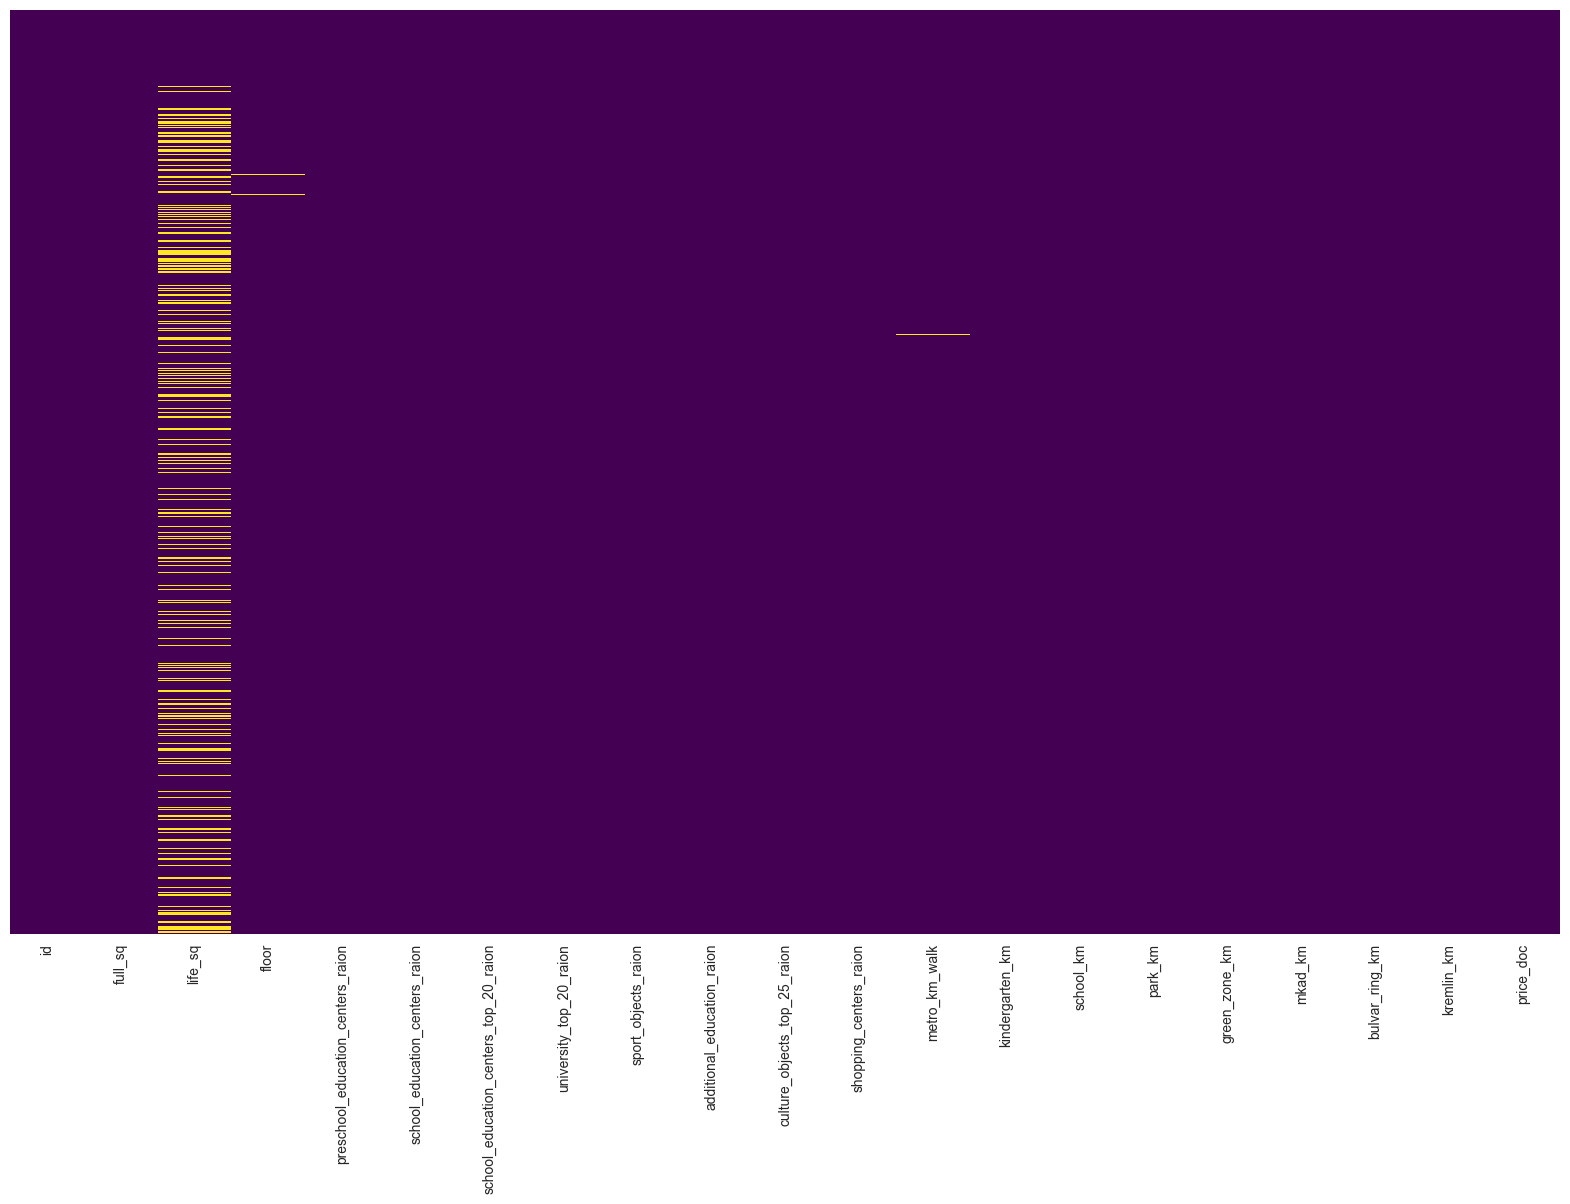

In [6]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Здесь фиолетовым показаны заполненные ячейки, а желтым — пропущенные значения. Благодаря этому мы можем сразу оценить количество пропусков и посмотреть, в каких переменных они встречаются. Если пропуски встречаются в большом количестве только в нескольких переменных, которые не являются для нас важными, можно их удалить.

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

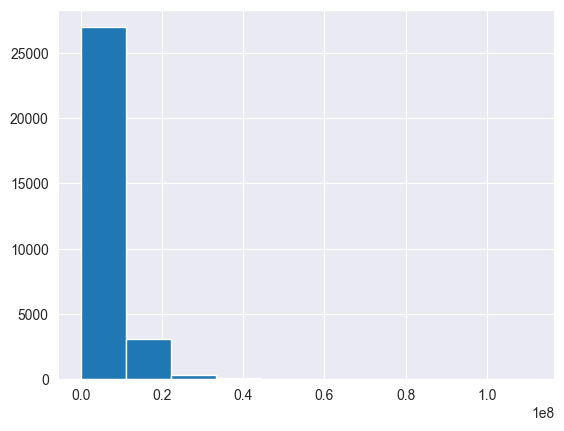

In [7]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логарифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

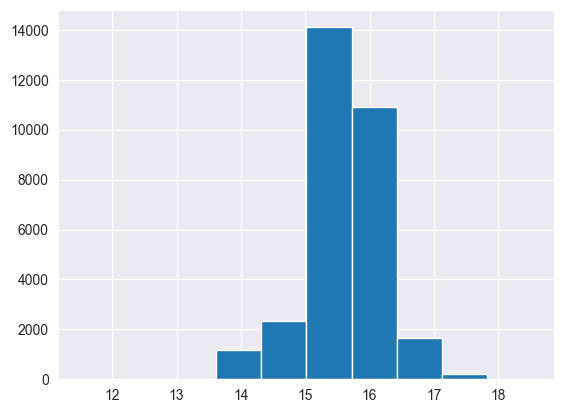

In [8]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

<Axes: >

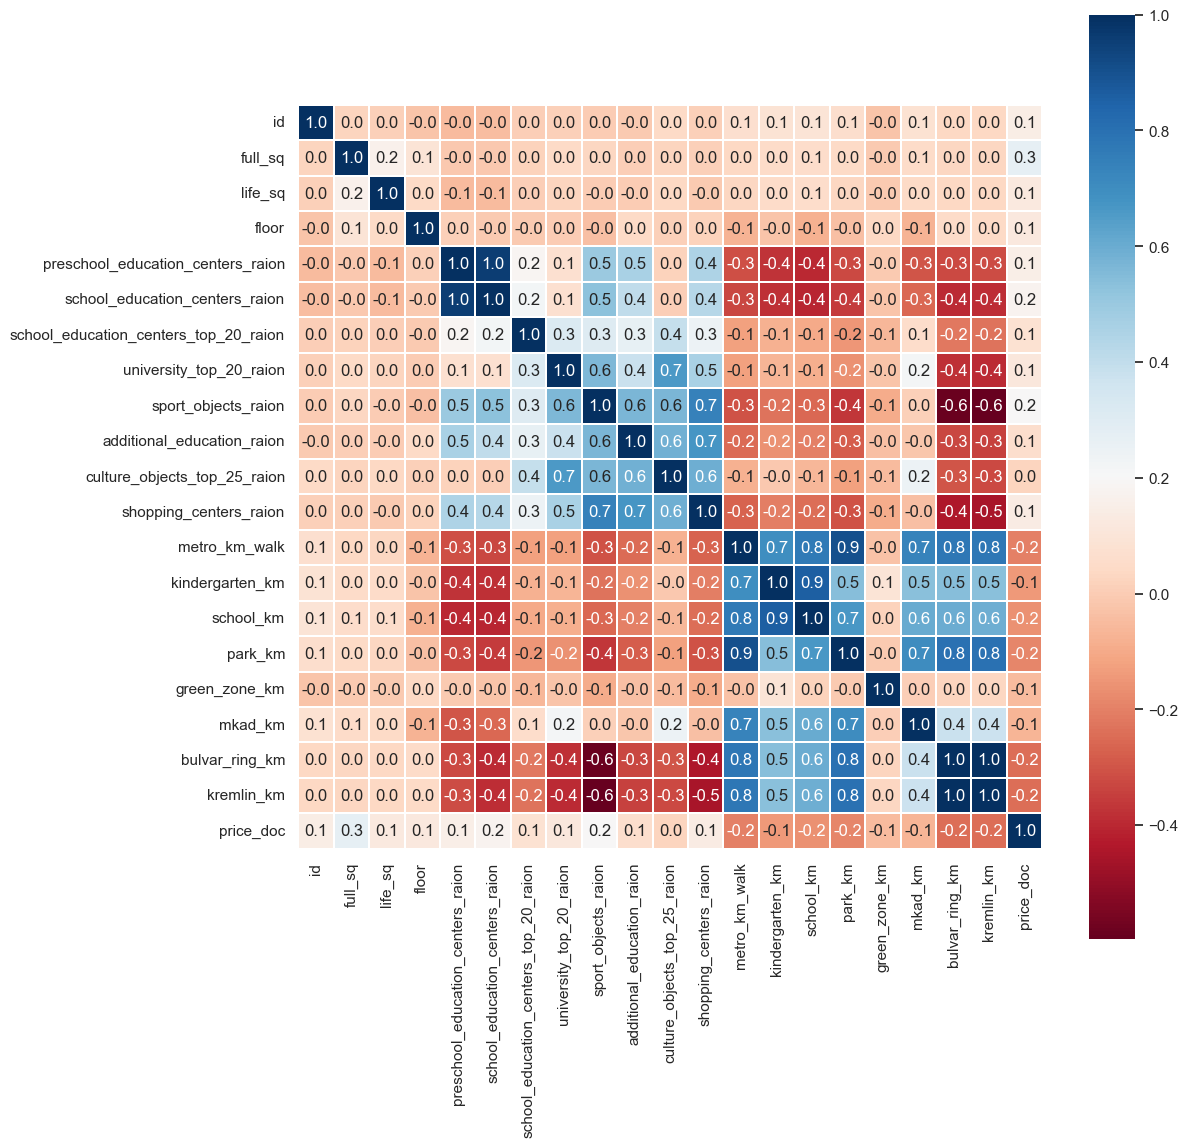

In [9]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

1. Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
2. Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
3. Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
4. Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

# Задание 3.5.1

Удалите строки, где есть хотя бы один пропуск. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77. Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно (!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам). Вычислите MSE, ответ округлите до целых.

Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от y!

In [15]:
# Подгрузим нужную функцию для разбиения:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import math
# Давайте вычислим метрики для этих данных!
from sklearn import metrics  # подгружаем метрики

d = data

d = d.drop(['id', 'life_sq', 'preschool_education_centers_raion', 'kindergarten_km', 'park_km', 'kremlin_km'], axis=1)

d.dropna(axis=0, how='any', inplace=True)

x = d.iloc[:,:-1].values
y = d.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=77)

# Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно (!) с помощью функции RobustScaler()
robust_scaler = RobustScaler()
X_train_scaled_robust = robust_scaler.fit_transform(x_train)
X_test_scaled_robust = robust_scaler.transform(x_test)

# Теперь обучим модель:
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(x_train,y_train) #обучаем модель на обучающих данных

# Теперь можем попробовать предсказать значения зависимой переменной для тестовой выборки:
y_pred = myModel.predict(x_test)

# Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от y
y_testt =  [((np.exp(y_test_y))  - 1) for y_test_y  in y_test ]
y_predd =  [((np.exp(y_pred_y))  - 1) for y_pred_y  in y_pred ]

MSE = metrics.mean_squared_error(y_testt, y_predd)
print(int(MSE))
print(round(MSE))
print(MSE)



16818684371715
16818684371715
16818684371715.129
